In [78]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt ## matplotlib
from datetime import datetime
import re

In [2]:
import pymongo
import sys
import os
import csv

if sys.platform =="darwin":
    client = pymongo.MongoClient('143.248.156.197')
#window에서 실행
else:
    client = pymongo.MongoClient('localhost')

db=client.research
sdb=client.sillok

aksManIndex=db.aksManIndex
aksManInfo=db.aksManInfo
collection = db.sillokManInfo
sillokManIndex=db.sillokManIndex_new
sillokManInfo = db.sillokManInfo
akssillokJoined = db.akssillokJoined
sillokIntegrated = sdb.sillokIntegrated

In [12]:
def makeCountFile():
    persons = sillokManIndex.find()
    with open('namecount.csv','w') as f:
        fieldnames=['name','count']
        writer=csv.DictWriter(f,fieldnames=fieldnames)
        writer.writeheader()
        for person in persons:
            records=[i for i in sillokIntegrated.find({"nameIndex":{"$in":[person['nameIndex']]}})]
            records.sort(key=lambda k: k['date'])
            rdict={}
            rdict['name']=person['nameIndex']+'_'+person['이름']
            rdict['count']=len(records)
            writer.writerow({'name':rdict['name'],'count':rdict['count']})

In [17]:
def makeBasicFile():
    persons = sillokManIndex.find({"이름":"맹사성"})
    fieldnames=['이름', '생년', '몰년', '한자명', '본관', '성씨', '자', '호', '시호', '봉호', '군호', '묘호', '신분', '국가']
    for person in persons:
        pname=person['이름']
        allfiles=os.listdir('./trackRecord/')
        if person['이름']+'_bi'+'.txt' in allfiles:
            alias_no=allfiles.count(pname+'_bi.txt')
            pname=pname+str(alias_no+1)
            
        with open('./trackRecord/'+pname+'_bi'+'.txt', 'w') as f:
            for fieldname in fieldnames:
                f.write(fieldname)
                f.write('\t')
                try:
                    f.write(str(person[fieldname]).replace(' ',''))
                except:
                    f.write(' ')
                f.write('\n')

In [205]:
def makeCareerFile():
    persons = sillokManIndex.find()
    fieldnames=['이름', '생년', '몰년', '한자명', '본관', '성씨', '자', '호', '시호', '봉호', '군호', '묘호', '신분', '국가','date','관력']
    for person in persons:
        pname=person['이름']
        allfiles=os.listdir('./trackRecord/')
        if person['이름']+'_cr'+'.txt' in allfiles:
            alias_no=allfiles.count(pname+'_cr.txt')
            pname=pname+str(alias_no+1)
            
        with open('./trackRecord/'+pname+'_cr'+'.txt', 'w') as f:
            records=[i for i in sillokManInfo.find({"url":person['_id']})]
            for record in records:
                try:
                    date=record['date']
                except:
                    pass
                f.write(date)
                f.write('\t')
                f.write(record['관력'])
                f.write('\n')

In [201]:
def makeArticleFile():
    persons = sillokManIndex.find({"이름":'맹사성'})
    for person in persons:
        pname=person['이름']
        allfiles=os.listdir('./trackRecord/')
        if person['이름']+'_at'+'.txt' in allfiles:
            alias_no=allfiles.count(pname+'_at.txt')
            pname=pname+str(alias_no+1)
            
        with open('./trackRecord/'+pname+'_at'+'.txt', 'w') as f:
            records=[i for i in sillokIntegrated.find({"nameIndex":{"$in":[person['nameIndex']]}})]
            for record in records:
                date=record['date']
                f.write(date)
                f.write('\t')
                for i in record['subject']:
                    f.write(str(i))
                    f.write(' ')
                f.write('\n')

In [206]:
makeCareerFile()


KeyError: '관력'

In [28]:
for i in sillokIntegrated.find():
    if "판좌군도총제부사" in i['paragraph']:
        print(i)

{'bookIndex': [], 'date': '1419-05-28L0', 'title': '사복 제조로 있으면서 살곶이 목장의 땅 수결을 훔쳐 경작한 김남수가 파직되다', 'books': [], 'paragraph': '판좌군도총제부사 김남수(金南秀) 의 관직을 파면하니, 남수 가 사복 제조가 되었을 때에, 살곶이[箭串] 목장(牧場)에서 수결(數結)의 땅을 도적질하여 경작을 하였다가 일이 발각되매, 의금부에서 국문하고 파직하였다.', 'places': ['箭串'], 'soldate': '1419-06-21', 'original': '○罷判左軍都摠制府事職。 爲司僕提調, 於牧場, 盜耕數結。 事發, 下義禁府, 鞫問罷職。', 'names': ['金南秀', '南秀'], 'nameIndex': ['M_0001441', 'M_0001441'], 'placeIndex': ['0078025_0'], '_id': 'http://sillok.history.go.kr/id/kda_10105028_005', 'subject': ['인사-임면(任免)', '농업(農業)', '교통-육운(陸運)'], 'king': '세종'}
{'bookIndex': [], 'date': '1420-07-10L0', 'title': '국장·산릉 도감 등의 담당관을 임명하다', 'books': [], 'paragraph': '좌의정 박은 과 우의정 이원 으로 국장 도감 도제조(國葬都監都提調)를 삼고, 호조 판서 정역 과 전 유후 권진 과 공조 참판 이천 으로 제조(提調)를 삼고, 청평 부원군  이백강 으로 산릉 도감 제조(山陵都監提調)를 삼고, 판좌군도총제부사(判左軍都摠制府使) 박자청 ·전 부윤 서선 으로 제조를 삼았다. 치상하고 재올리고 하는 등의 일들을 감독하는 도감은 전례의 의식에 따랐다. 빈전을 열고 법석(法席) 기일(期日)에 상왕이 말하기를, "이번 대비의 병환에 부처에게 빌어 살기를 구함이 지극하지 않음이 없으되, 마침내 효험이 없었고, 또 성미가 불도를 좋아하지 않는 고로, 내가 이를 시설하지 

In [30]:
for i in sillokIntegrated.find({"date":"1447-11-09L0"}):
    print(i)

{'bookIndex': [], 'date': '1447-11-09L0', 'title': '시명의 보와 대보의 쓰임을 전지하다', 'books': [], 'paragraph': '승정원(承政院)에 전지하기를, "시명(施命)의 보(寶)는 책봉 교서(冊封敎書) 등의 일에 쓰고 무릇 제수에 관계되는 일은 모두 대보(大寶)를 쓰라." 하였다.', 'places': [], 'soldate': '1447-12-16', 'original': '○戊戌/傳旨承政院: "施命之寶, 用於冊封敎書等事; 凡干除授之事, 皆用大寶。"', 'names': [], 'nameIndex': [], 'placeIndex': [], '_id': 'http://sillok.history.go.kr/id/kda_12911009_001', 'subject': ['행정-중앙행정(中央行政)', '왕실-국왕(國王)'], 'king': '세종'}
{'bookIndex': ['0211645_0', '0211647_0'], 'date': '1447-11-09L0', 'title': '예문관 대제학 박안신의 졸기', 'books': ['大藏經', '大藏經'], 'paragraph': '예문관 대제학 박안신(朴安臣) 이 졸(卒)하였다. 안신(安臣) 의 자(字)는 백충(伯忠) 이요, 상주(尙州) 사람인데 판사재시사(判司宰寺事) 박문로(朴文老) 의 아들이다. 과거에 올라 사관(史官)에 보직되고, 무자년에 사간원 좌정언을 제수받았다. 대사헌 맹사성(孟思誠) 과 함께 목인해(睦仁海) 의 사건을 다스리다가 태종(太宗) 의 뜻에 거슬려 극형을 받게 되었으나, 사성(思誠) 에게 말하기를, "죽고 사는 것은 명(命)에 있으니 무얼 근심하고 무엇을 두려워하리오." 하고, 시(詩)를 지어 벽 뒤에 썼다. 여러 번 옮겨 사헌 집의가 되고 판선공감사(判繕工監事)가 되었다. 갑진년에는 일본(日本) 에서 사신을 보내어 와서 대장경판(大藏經板) 을 청하였다. 국가에서 허락하지 않고 안신(安臣) 을 보내어 회례사(回禮使)를 삼고 예물과 불경(佛

In [40]:
l=[]
for i in sillokIntegrated.find():
    if "M_0002242" in i['nameIndex']:
        l.append(i)

In [41]:
l.sort(key=lambda k: k['date'])

In [43]:
for i in l:
    print(i)

{'bookIndex': [], 'date': '1396-08-29L0', 'title': '정희계의 시호문제로 봉상시의 관원들을 가두다', 'books': [], 'paragraph': '이튿날[편찬자 주: 갑인을 이튿날로 번역함] 임금이 시호를 정한 봉상 박사(奉常博士) 최견(崔蠲) 을 불러서 물었다. " 희계 는 원훈(元勳)인데 시호를 왜 이다지도 심하게 하였느냐? 또 단지 그 허물만을 논하고 그 공은 말하지 않은 것은 무슨 까닭인가?" 즉시 순군옥(巡軍獄)에 내려 국문하게 하고, 또 봉상 소경(奉常少卿) 안성(安省) 과 봉상시 승(奉常寺丞) 김분(金汾) ·대축(大祝) 한고(韓皐) ·협률랑(協律郞) 민심언(閔審言) ·녹사(錄事) 이사징(李士澄) 을 가두었다. 이에 형조에서 산기 상시(散騎常侍) 전백영(全伯英) · 이황(李滉) 등을 탄핵하고, 또 예조 의랑(禮曹議郞) 맹사성(孟思誠) ·좌랑(佐郞) 조사수(趙士秀) 등의 봉상시에서 시호를 잘못 마련한 것을 반박하지 않은 죄를 탄핵하였다.', 'places': [], 'soldate': '1396-10-01', 'original': '○甲寅/上召定諡奉常博士問曰: ", 元勳也。 贈諡何若是其甚耶? 且但論其過, 不擧其功, 何耶?" 卽下巡軍獄鞫之, 又囚奉常少卿、寺丞、大祝、協律郞、錄事。 於是, 刑曹劾散騎常侍、等, 又劾禮曹議郞、佐郞。 不駁奉常寺贈諡之誤也。', 'names': ['崔蠲', '熙啓', '安省', '金汾', '韓皐', '閔審言', '李士澄', '全伯英', '李滉', '孟思誠', '趙士秀'], 'nameIndex': ['M_0068245', 'M_0005969', 'M_0049793', 'M_0008593', 'M_0059358', 'M_0063595', 'M_0041001', 'M_0005702', 'M_0008461', 'M_0002242', 'M_0008594'], 'placeIndex': [], '_id': 'http://sillok.history.go.kr/id/kaa_10508029_001', 'sub

In [45]:
for i in sillokIntegrated.find({"date":"1396-08-29L0"}):
    print(i)


{'bookIndex': [], 'date': '1396-08-29L0', 'title': '정희계의 시호문제로 봉상시의 관원들을 가두다', 'books': [], 'paragraph': '이튿날[편찬자 주: 갑인을 이튿날로 번역함] 임금이 시호를 정한 봉상 박사(奉常博士) 최견(崔蠲) 을 불러서 물었다. " 희계 는 원훈(元勳)인데 시호를 왜 이다지도 심하게 하였느냐? 또 단지 그 허물만을 논하고 그 공은 말하지 않은 것은 무슨 까닭인가?" 즉시 순군옥(巡軍獄)에 내려 국문하게 하고, 또 봉상 소경(奉常少卿) 안성(安省) 과 봉상시 승(奉常寺丞) 김분(金汾) ·대축(大祝) 한고(韓皐) ·협률랑(協律郞) 민심언(閔審言) ·녹사(錄事) 이사징(李士澄) 을 가두었다. 이에 형조에서 산기 상시(散騎常侍) 전백영(全伯英) · 이황(李滉) 등을 탄핵하고, 또 예조 의랑(禮曹議郞) 맹사성(孟思誠) ·좌랑(佐郞) 조사수(趙士秀) 등의 봉상시에서 시호를 잘못 마련한 것을 반박하지 않은 죄를 탄핵하였다.', 'places': [], 'soldate': '1396-10-01', 'original': '○甲寅/上召定諡奉常博士問曰: ", 元勳也。 贈諡何若是其甚耶? 且但論其過, 不擧其功, 何耶?" 卽下巡軍獄鞫之, 又囚奉常少卿、寺丞、大祝、協律郞、錄事。 於是, 刑曹劾散騎常侍、等, 又劾禮曹議郞、佐郞。 不駁奉常寺贈諡之誤也。', 'names': ['崔蠲', '熙啓', '安省', '金汾', '韓皐', '閔審言', '李士澄', '全伯英', '李滉', '孟思誠', '趙士秀'], 'nameIndex': ['M_0068245', 'M_0005969', 'M_0049793', 'M_0008593', 'M_0059358', 'M_0063595', 'M_0041001', 'M_0005702', 'M_0008461', 'M_0002242', 'M_0008594'], 'placeIndex': [], '_id': 'http://sillok.history.go.kr/id/kaa_10508029_001', 'sub

In [202]:
with open('../output/trackRecord/맹사성_lg.csv','r') as f:
    data=csv.DictReader(f)
    ndata=[]
    for i in data:
        grade=i['grade']
        gradenumber=int(grade[1])
        if "정" in grade:
            level=20-gradenumber*2
        else:
            level=19-gradenumber*2
        i['level']=level
        print(i)
        ndata.append(i)
with open('../output/trackRecord/맹사성_nlg.csv','w') as wf:
    fieldnames=['date','pname','dname','grade','level']
    writer=csv.DictWriter(wf,fieldnames=fieldnames)
    writer.writeheader()
    for i in ndata:
        writer.writerow(i)
        


FileNotFoundError: [Errno 2] No such file or directory: 'trackRecord/맹사성_lg.csv'

In [203]:
d=pd.read_csv('../output/trackRecord/맹사성_nlg.csv')
ndate=pd.Series([pd.to_datetime(str(int(i[0:4])+500)+i[4:-2]) for i in d['date']])
d['date']=pd.Series([i[:-2] for i in d['date']])
d.head()

,date,pname,dname,grade,level
0,1396-08-29,예조 의랑(禮曹議郞),예조,정4품,12
1,1399-09-10,우간의 대부(右諫議大夫),문하부,종3품,13
2,1400-08-04,좌산기(左散騎),문하부,정3품,14
3,1400-11-13,좌산기(左散騎),문하부,정3품,14
4,1400-11-13,문하부 낭사(門下府郞舍),문하부,정3품,14


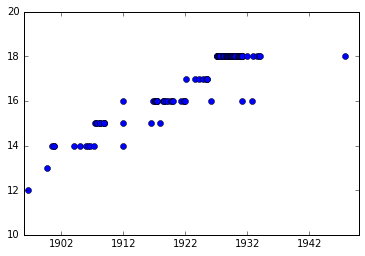

In [204]:
x,y=[],[]

x=ndate

y=d['level']

pd.to_datetime('1994/1/1')

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
plt.plot(x,y, 'o')
plt.ylim(10,20)
plt.xlim(pd.to_datetime('1896/1/1'),pd.to_datetime('1950/1/1'))
plt.savefig("../output/trackRecord/t.eps",format='eps', dpi=1000)

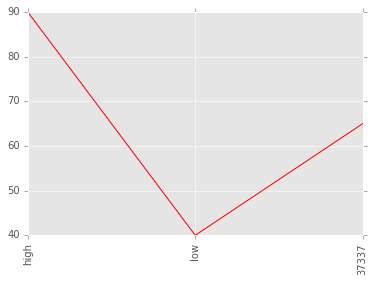

In [134]:
x = [0,1,2]
y = [90,40,65]
labels = ['high', 'low', 37337]
plt.plot(x,y, 'r')
plt.xticks(x, labels, rotation='vertical')
plt.show()

In [207]:
s=set()
c=[set(i['career']) for i in sillokManIndex.find({},{"career":1})]
s.update(c)
s


TypeError: unhashable type: 'set'

In [37]:
man = sillokManIndex.find_one({"이름":"정인지(鄭麟趾)"});
df=pd.DataFrame((man['career']),columns=['career',]);
df['soldate']=man['soldate']
df['rdate']=man['rdate'];df.head()

,career,soldate,rdate
0,부교리(副校理),1415-07-09,8373
1,예조(禮曹)좌랑(佐郞),1416-11-24,8877
2,좌랑(佐郞),1417-05-29,9063
3,좌랑(佐郞),1419-02-13,9688
4,병조(兵曹)정랑(正郞),1421-04-29,10494


In [65]:
#load gwanjikdictionary
with open('../collection/gwanjikdictionary_by_buseo.json') as f:
    gwanjikdic = json.load(f)
gwanjikdic

[{'department': '종친부(宗親府)',
  'grade': {'감(監)': 8,
   '군(君)': 15,
   '도정(都正)': 14,
   '령(令)': 10,
   '봉사(參奉)': 1,
   '부령(副令)': 9,
   '부수(副守)': 11,
   '부정(副正)': 13,
   '수(守)': 12,
   '전적(典簿)': 10,
   '전적(典籤)': 12,
   '정(正)': 14,
   '정경(正卿)': 16,
   '종정경(宗正卿)': 15,
   '주부(主簿)': 7,
   '지종(知宗)': 17,
   '직장(直長)': 5,
   '판종정경(判宗正卿)': 18}},
 {'department': '의정부(議政府)',
  'grade': {'검상(檢詳)': 10,
   '공사관(公事官)': 7,
   '사록(司錄)': 4,
   '사인(舍人)': 12,
   '영의정(領議政)': 18,
   '우의정(右議政)': 18,
   '우찬성(右贊成)': 17,
   '우참찬(右參贊)': 16,
   '좌의정(左議政)': 18,
   '좌찬성(左贊成)': 17,
   '좌참찬(左參贊)': 16}},
 {'department': '제언사(堤堰司)',
  'grade': {'낭청(郎廳)': 7, '도제조(都提調)': 18, '제조(提調)': 16}},
 {'department': '충훈부(忠勳府)', 'grade': {'경력(經歷)': 11, '군(君)': 15, '도사(都事)': 9}},
 {'department': '의빈부(儀賓府)',
  'grade': {'경력(經歷)': 11,
   '도사(都事)': 9,
   '부위(副尉)': 14,
   '위(尉)': 15,
   '첨위(僉尉)': 14}},
 {'department': '돈녕부(敦寧府)',
  'grade': {'도정(都正)': 14,
   '동지사(同知事)': 15,
   '봉사(奉事)': 3,
   '부정(副正)': 13,
   '영사(領事)': 18,
   '정(正)': 14,
 

In [189]:
def gwanjik_search(gwanjik):
    found=[]
    hangwanjik=re.sub(r'\(.*\)','',gwanjik)

    for dept in gwanjikdic:
        deptname=dept['department']
        for grade in dept['grade']:
            hangrade=re.sub(r'\(.*\)','',grade)
            p=re.search(r'.*'+hangwanjik+r'.*',hangrade)

            if p != None:              
                tmp={}
                level = dept['grade'][grade]
                tmp[grade]=level

                found.append(tmp)
    
    found=[dict(y) for y in set(tuple(x.items()) for x in found)]

    
    
    return found



In [190]:
gwanjik_search('우의정(右議政)')

[{'우의정(右議政)': 18}]

In [191]:
levels=[]
for career in df['career']:
    result=gwanjik_search(career)
    print(result)
    if len(result) == 0:
        levels.append(0)
    elif len(result) == 1:
        level = list(result.pop().values()).pop()
        levels.append(level)
    else:
        levels.append(0)

df['level']=levels;df

[{'부교리(副校理)': 9}]
[]
[{'좌랑(佐郞)': 8}]
[{'좌랑(佐郞)': 8}]
[]
[]
[]
[]
[{'직제학(直提學)': 14}]
[]
[]
[]
[{'부제학(副提學)': 14}]
[{'부제학(副提學)': 14}]
[{'부제학(副提學)': 14}]
[{'부제학(副提學)': 14}]
[{'부제학(副提學)': 14}]
[{'시강관(侍講官)': 12}]
[]
[]
[{'직제학(直提學)': 14}, {'제학(提學)': 16}, {'부제학(副提學)': 14}, {'제학(提學)': 15}, {'대제학(大提學)': 16}]
[{'직제학(直提學)': 14}, {'제학(提學)': 16}, {'부제학(副提學)': 14}, {'제학(提學)': 15}, {'대제학(大提學)': 16}]
[]
[{'직제학(直提學)': 14}, {'제학(提學)': 16}, {'부제학(副提學)': 14}, {'제학(提學)': 15}, {'대제학(大提學)': 16}]
[]
[]
[{'직제학(直提學)': 14}, {'제학(提學)': 16}, {'부제학(副提學)': 14}, {'제학(提學)': 15}, {'대제학(大提學)': 16}]
[]
[]
[]
[{'직제학(直提學)': 14}, {'제학(提學)': 16}, {'부제학(副提學)': 14}, {'제학(提學)': 15}, {'대제학(大提學)': 16}]
[]
[]
[]
[]
[]
[]
[]
[]
[{'참판(參判)': 15}]
[{'참판(參判)': 15}]
[]
[]
[]
[{'판서(判書)': 16}]
[{'판서(判書)': 16}]
[]
[]
[]
[]
[]
[]
[]
[]
[{'제조(提調)': 16}, {'부제조(副提調)': 14}, {'도제조(都提調)': 18}, {'도제조(都提調)': 17}]
[]
[]
[]
[]
[]
[]
[]
[]
[{'제조(提調)': 16}, {'부제조(副提調)': 14}, {'도제조(都提調)': 18}, {'도제조(都提調)': 17}]
[]
[]
[]
[]
[]
[]
[]
[]
[{'대제학(大提學)': 16}]


,career,soldate,rdate,level
0,부교리(副校理),1415-07-09,8373,9
1,예조(禮曹)좌랑(佐郞),1416-11-24,8877,0
2,좌랑(佐郞),1417-05-29,9063,8
3,좌랑(佐郞),1419-02-13,9688,8
4,병조(兵曹)정랑(正郞),1421-04-29,10494,0
5,집현전응교(集賢殿應敎),1423-05-03,11228,0
6,예문응교(藝文應敎),1427-03-09,12634,0
7,집현전직제학(集賢殿直提學),1427-04-16,12672,0
8,직제학(直提學),1427-08-15,12793,14
9,좌필선(左弼善),1427-08-28,12806,0


In [192]:
pd.DataFrame.to_csv(df,'../output/trackRecord/정인지_nlg.csv')
#manually insert

In [195]:
df=pd.read_csv('../output/trackRecord/정인지_nlg.csv'); df.head()

,Unnamed: 0,career,soldate,rdate,level
0,0,부교리(副校理),1415-07-09,8373,9
1,1,예조(禮曹)좌랑(佐郞),1416-11-24,8877,8
2,2,좌랑(佐郞),1417-05-29,9063,8
3,3,좌랑(佐郞),1419-02-13,9688,8
4,4,병조(兵曹)정랑(正郞),1421-04-29,10494,10


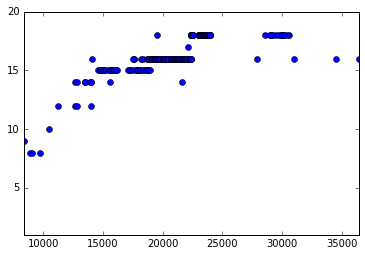

In [207]:
x,y=[],[]

x=df['rdate']

y=df['level']

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
plt.plot(x,y, 'o')
plt.ylim(1,20)
plt.xlim(8370,36413)
plt.savefig("../output/trackRecord/jij.eps",format='eps', dpi=1000)